# Starry light curve

*jaxoplanet* aims to match the features of starry, a framework to compute light curves of non-uniform spherical bodies. In this small tutorial we demonstrate some of this features.

```{warning}
Under construction!
```

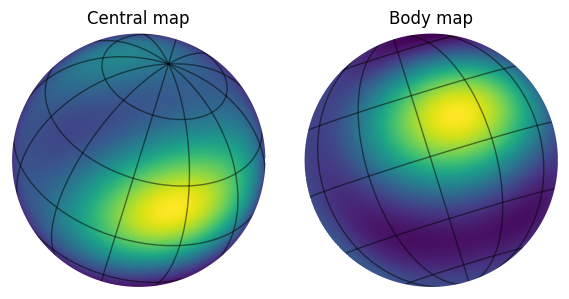

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from jaxoplanet.experimental.starry.utils import show_map
from jaxoplanet.experimental.starry.maps import Map
from jaxoplanet.experimental.starry.ylm import Ylm

y = Ylm.from_dense(np.hstack([1.0, np.random.rand(20) * 1e-1]))
map_1 = Map(y=y, inc=0.9, obl=-0.3, period=1.2, u=[0.5, 0.5])

y = Ylm.from_dense(np.hstack([0.3, np.random.rand(20) * 1e-1]))
map_2 = Map(y=y, inc=1.6, obl=0.3, period=-0.8, u=[0.2, 0.5])

plt.figure(figsize=(6, 3))
plt.subplot(121)
show_map(map_1)
plt.title("Central map")
plt.subplot(122)
show_map(map_2)
plt.title("Body map")
_ = plt.tight_layout()

In [3]:
from jaxoplanet.orbits import keplerian
from jaxoplanet.experimental.starry.light_curves import light_curve

system = keplerian.System(
    keplerian.Central(map=map_1),
    bodies=[keplerian.Body(radius=0.3, period=1.0, map=map_2)],
)

time = np.linspace(-2.0, 2.0, 1000)
y = light_curve(system, time)

plt.figure(figsize=(12, 4))
plt.plot(y.sum(0), c="k")